In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys 
sys.path.insert(0, "../src")
import configparser
import pandas as pd 
import numpy as np
import torch
import matplotlib.pyplot as plt
from os.path import join as oj

import my_data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cuda = False # torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
_,y, _, _ = my_data.load_layer_data(oj(data_path, 'lno'))
y_second, _, _ = my_data.load_reannotation(oj(data_path, 'lno_second_annotation'))
y_second_formatted = np.copy(y_second)
y_second_formatted_vals = np.unique(y_second_formatted)
for i,val in enumerate(y_second_formatted_vals):
    y_second_formatted[y_second == val] = i

ImageJ series: invalid metadata or corrupted file ()


In [8]:
y_second_formatted = y_second_formatted[1024:, :1024] # only one quarter annotated
y = y[-1]

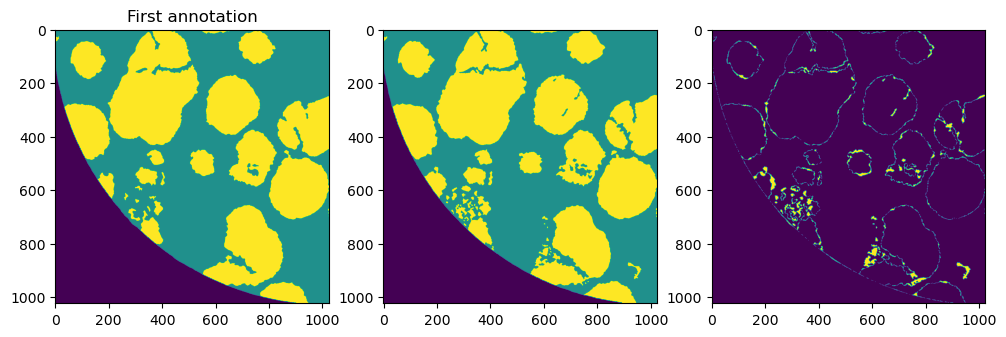

In [9]:
fig, axes = plt.subplots(ncols=3, figsize= (12,4))
axes[0].imshow(y)
# add title
axes[0].set_title('First annotation')
axes[1].imshow(y_second_formatted)

axes[0].set_title('Second annotation')
axes[2].imshow(y != y_second_formatted)

In [10]:
y_pred = y_second_formatted[None,:]
y_pred_one_hot = torch.nn.functional.one_hot(torch.Tensor(y_pred).to(torch.int64), 
                                            num_classes=3).permute(0, 3, 1, 2).squeeze()[None, :]


In [11]:
print(multiclass_dice_coeff(y_pred_one_hot.float(), 
                    torch.Tensor(y[None,:]), 
                    num_classes=3).item())


tensor(0.9980)
tensor(0.9693)
tensor(0.9611)
0.9761262536048889
